# Problem Analysis
* Here we have a serious problem related to fraud happening on daily basis with many peoples , in this problem statement we have to make a model that is mature enough to predict with which input fraud will happen 
* Here our target variable is fraud attributes in the dataset , we have to predict with which input fraud will happen 

# Importing required libraries

In [1]:
import pandas as p
import numpy as n
import seaborn as s
import matplotlib.pyplot as m
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
%matplotlib inline

# Performing exploratory data analysis

# • Copying dataset into the variable "df"

In [2]:

df = p.read_csv("card_transdata.csv")
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


# • Checking the shape of the dataset


In [3]:
df.shape #printing the shape of the dataset

(1000000, 8)

# • Printing first 5 rows by using .head() function

In [4]:
df.head(5) # printing first 5 rows of the dataset


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [5]:
df.info() # checking the dataset datatype , null values etc.,

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


# • Printing datatypes of the datasets

In [6]:
print(df.dtypes) # printing datatypes of the datasets

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object


# • Statistics summary of the features

In [7]:
df.describe(include='all')


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


# Analysation
* As we can see in the above representation there is no missing values as the count value is same for every columns,
  Count tells the number of the variable present inside the attributes
*


# • Checking missing values of each columns


In [8]:
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [9]:
df.isnull().values.any()

False

# Distribution of target variable 

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fraud', ylabel='Density'>

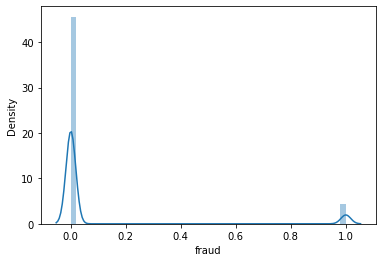

In [10]:
s.distplot(df["fraud"])

 * As we can see most of the data values lies at 0 and very less values in 1 , This shows our data is unbalanced 

# Distribution of the all features
* We are using pairplot to analyse the dataset

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='distance_from_last_transaction', ylabel='Density'>

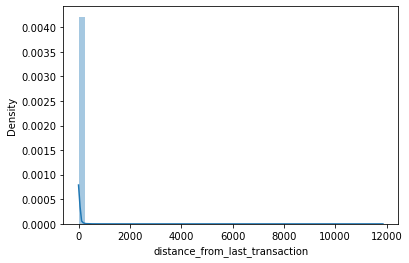

In [32]:
s.distplot(df["distance_from_last_transaction"])

In this attribute there are no outlier as all the values points concentrated  in a very small range

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='repeat_retailer', ylabel='Density'>

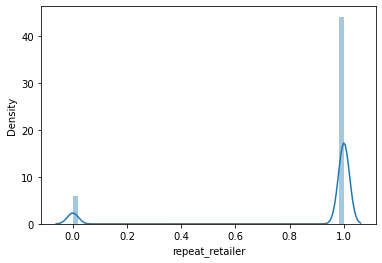

In [36]:
s.distplot(df["repeat_retailer"])

In this attribute most of values are concentrated in between 0.9 to 1 , some of the data values lies far away from the mainly concentrated values those are outliers in the date attributes

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='distance_from_home', ylabel='Density'>

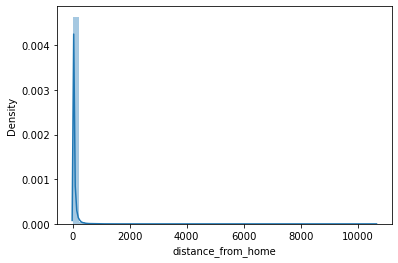

In [39]:
s.distplot(df["distance_from_home"])

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ratio_to_median_purchase_price', ylabel='Density'>

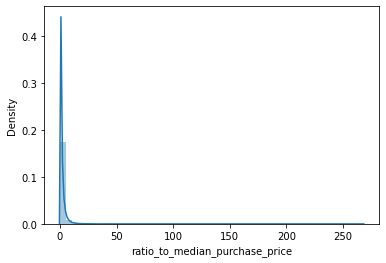

In [40]:
s.distplot(df["ratio_to_median_purchase_price"])

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='used_chip', ylabel='Density'>

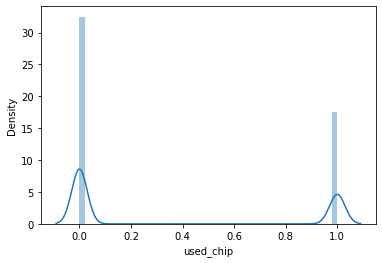

In [41]:
s.distplot(df["used_chip"])

Here as we can see most of large concentration of data points is in the range of 0.0 to 0.1 but there are significant number of data points lies in the range of 0.9 to 1 

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='used_pin_number', ylabel='Density'>

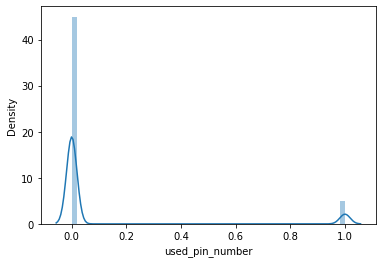

In [42]:
s.distplot(df["used_pin_number"])

In this attributes there are some outliers in the range of 1

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='online_order', ylabel='Density'>

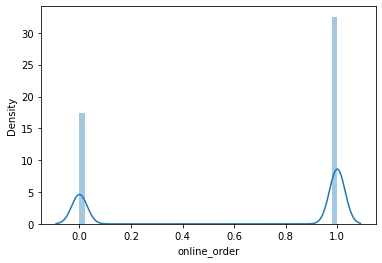

In [43]:
s.distplot(df["online_order"])

Here as we can see most of large concentration of data points is in the range of 0.9 to 1.0 but there are significant number of data points lies in the range of 0.0 to 0.1

# Box plots of the all attributes 

<AxesSubplot:>

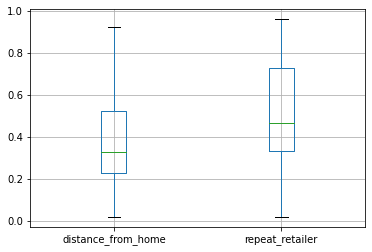

In [53]:
df = p.DataFrame(data = n.random.random(size=(12,2)), columns = ['distance_from_home','repeat_retailer'])
df.boxplot()

<AxesSubplot:>

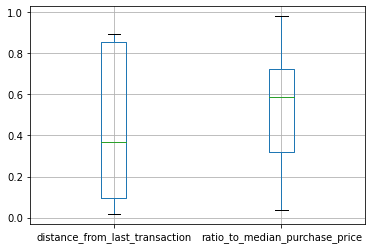

In [54]:
df = p.DataFrame(data = n.random.random(size=(12,2)), columns = ['distance_from_last_transaction','ratio_to_median_purchase_price'])
df.boxplot()

<AxesSubplot:>

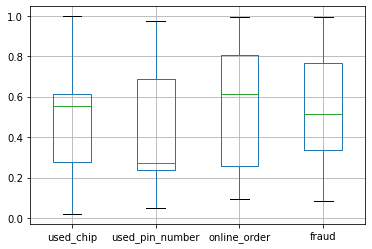

In [56]:
df = p.DataFrame(data = n.random.random(size=(16,4)), columns = ['used_chip','used_pin_number','online_order','fraud'])
df.boxplot()

# Outliers
* As we can see their are some considerable amount of outliers which change the statistical data in a quite amount

# • Correalation heatmaps

In [11]:
df.corr() 

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.000000,0.000193,-0.001374,0.143124,-0.000697,-0.001622,-0.001301,0.187571
distance_from_last_transaction,0.000193,1.000000,0.001013,-0.000928,0.002055,-0.000899,0.000141,0.091917
ratio_to_median_purchase_price,-0.001374,0.001013,1.000000,0.001374,0.000587,0.000942,-0.000330,0.462305
repeat_retailer,0.143124,-0.000928,0.001374,1.000000,-0.001345,-0.000417,-0.000532,-0.001357
used_chip,-0.000697,0.002055,0.000587,-0.001345,1.000000,-0.001393,-0.000219,-0.060975
used_pin_number,-0.001622,-0.000899,0.000942,-0.000417,-0.001393,1.000000,-0.000291,-0.100293
online_order,-0.001301,0.000141,-0.000330,-0.000532,-0.000219,-0.000291,1.000000,0.191973
fraud,0.187571,0.091917,0.462305,-0.001357,-0.060975,-0.100293,0.191973,1.000000


<AxesSubplot:>

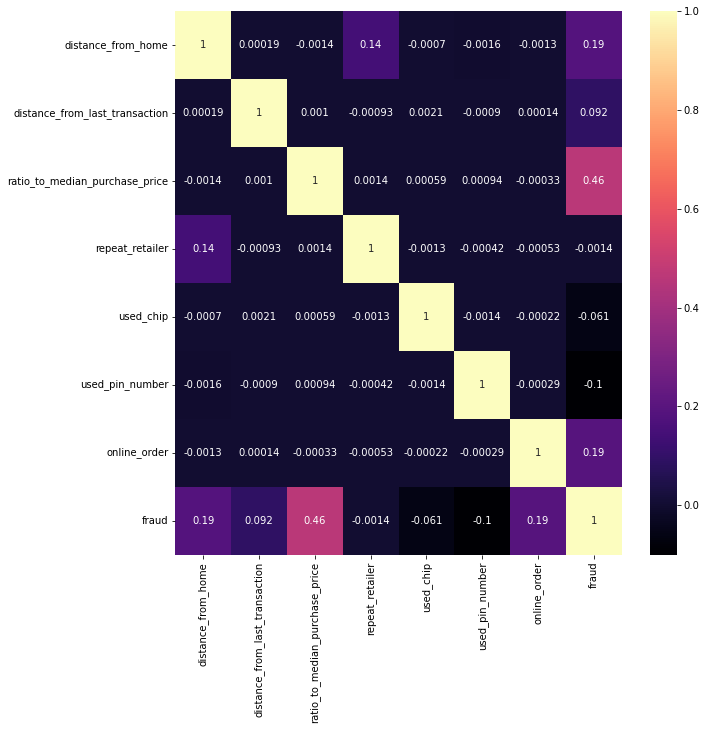

In [12]:
m.figure(figsize=(10,10))
s.heatmap(df.corr(), annot = True , cmap= "magma")

# Conclusion

* Here as we can see from the correlation heatmap that most of attributes are not related to the fraud , that means it does not affect the fraud transaction , only few attributes are quiet a bit related to the fraud transaction 
* ratio_to_median_purchase_price is the only attribute which is significantly correlated to the fraud datasets , which means it effects fraud rate and all other attributes very weakly correlated
* All other attributes are in not greater than 0.2 and -0.02 , those attributes does not affect much of the target variable

# Statistical analysis of the fraud data and Preprocessing

In [13]:
df['fraud'].value_counts() # checking the fraud entries here 0 represents safe transaction and 1 represents fraud
df.drop(['used_chip', 'used_pin_number'], axis=1)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0
...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,1.0,0.0


In [14]:
# separating safe and fraud data in separate variables
safe = df[df.fraud == 0]
fraud = df[df.fraud == 1]

In [15]:
#printing shapes of the safe and fraud data
print(safe.shape)
print(fraud.shape)

(912597, 8)
(87403, 8)


In [16]:

df.groupby('fraud').mean() 

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
fraud,,,,,,,
0.0,22.832976,4.301391,1.423642,0.881672,0.359402,0.109944,0.622225
1.0,66.261876,12.712185,6.006323,0.880119,0.256399,0.003123,0.946318


 here as we can see in our datasets , Our dataset highly imbalanced, the means between safe and fraud data is varies highly


## Here we will use undersampling as the data is imbalanced , because fraud transaction is less compared to the safe transaction
we will randomly take samples from safe data and then we will concatenate to the fraud data, here we are taking 87403 values as 
thats the total fraud transaction happens so we are taking equal number of fraud and safe data , so that it will give good accuracy in the model training

In [17]:
safe_sample = safe.sample(n=87403)

In [18]:
new_card_dataset = p.concat([safe_sample, fraud], axis=0) #concatenating two dataframes

In [19]:
new_card_dataset.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
417719,0.754798,0.669749,1.246930,0.0,1.0,0.0,0.0,0.0
439233,6.006012,0.800758,3.630823,1.0,1.0,0.0,1.0,0.0
414677,11.196896,2.643788,0.485546,1.0,0.0,0.0,0.0,0.0
627511,7.986038,1.779201,1.219609,1.0,0.0,0.0,0.0,0.0
965815,6.002335,0.246955,0.943708,1.0,0.0,0.0,1.0,0.0


In [20]:
new_card_dataset.tail()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
999908,45.296658,0.882736,8.856861,1.0,0.0,0.0,1.0,1.0
999916,167.139756,0.282253,0.308468,1.0,0.0,0.0,1.0,1.0
999919,124.640118,0.004416,0.434885,1.0,0.0,0.0,1.0,1.0
999939,51.412900,3.429330,29.914254,1.0,0.0,0.0,1.0,1.0
999949,15.724799,1.875906,11.009366,1.0,1.0,0.0,1.0,1.0


In [21]:
new_card_dataset['fraud'].value_counts() # checking if the number of fraud and safe transaction are equal or not

0.0    87403
1.0    87403
Name: fraud, dtype: int64

In [22]:
new_card_dataset.groupby('fraud').mean()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
fraud,,,,,,,
0.0,22.866643,4.276085,1.424710,0.881102,0.359976,0.107399,0.622347
1.0,66.261876,12.712185,6.006323,0.880119,0.256399,0.003123,0.946318


Here even after undersampling the mean of the old dataframe and new data frame is almost equal , The nature of the dataset is not changed , The difference is still there


# Selecting the training and testing dataset
 * dividing the datasets in training and testing variables 

In [23]:
X = new_card_dataset.drop(columns='fraud', axis=1)
Y = new_card_dataset['fraud']

In [24]:
X

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
417719,0.754798,0.669749,1.246930,0.0,1.0,0.0,0.0
439233,6.006012,0.800758,3.630823,1.0,1.0,0.0,1.0
414677,11.196896,2.643788,0.485546,1.0,0.0,0.0,0.0
627511,7.986038,1.779201,1.219609,1.0,0.0,0.0,0.0
965815,6.002335,0.246955,0.943708,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
999908,45.296658,0.882736,8.856861,1.0,0.0,0.0,1.0
999916,167.139756,0.282253,0.308468,1.0,0.0,0.0,1.0
999919,124.640118,0.004416,0.434885,1.0,0.0,0.0,1.0
999939,51.412900,3.429330,29.914254,1.0,0.0,0.0,1.0


In [25]:
Y

417719    0.0
439233    0.0
414677    0.0
627511    0.0
965815    0.0
         ... 
999908    1.0
999916    1.0
999919    1.0
999939    1.0
999949    1.0
Name: fraud, Length: 174806, dtype: float64

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [27]:
print(X.shape, X_train.shape, X_test.shape)

(174806, 7) (139844, 7) (34962, 7)


# Selecting our training model as logistic regression model
* as we have only two outcomes in our target variable , logistic regression is suited for binary regression problems


In [28]:
model = LogisticRegression()

In [29]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [31]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9394110580360974


As we can see our model is predicting with high accuracy